# Model de régression linaire .


- Machine learning with scipy, scikit learn, ....
- la fonction cout
- le model
- le gradiant
- la descent de gradiant 
- le learning rate (taux d'aprentissage)
- evaluayion du model (coefficient de détermination)


In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import plotly_express as px

In [41]:
x, y = make_regression(n_samples=100, n_features=1, noise = 10)
px.scatter(x, y)

In [42]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [4]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [5]:
np.random.seed(0)
theta = np.random.rand(2,1)
theta

array([[0.5488135 ],
       [0.71518937]])

In [6]:
def model(X, theta):
    return X.dot(theta)

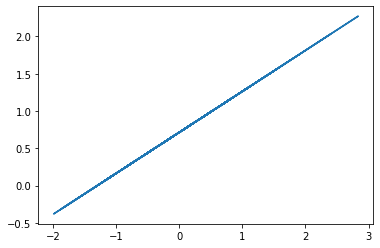

In [7]:
plt.plot(x, model(X, theta))

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

869.5292144440714

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
 def gradient_descent(X, y, theta, learning_rate, n_iteration):
        cost_history = np.zeros(n_iteration)
        for i in range(0, n_iteration):
            cost_history[i] = cost_function(X, y, theta)
            theta = theta - learning_rate * grad(X, y, theta)
        return theta, cost_history

In [12]:
test_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iteration=1000)


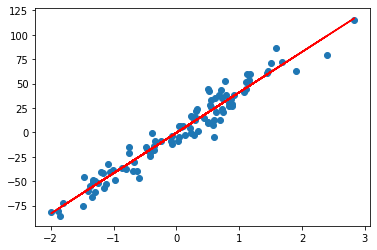

In [13]:
prediction = model(X, test_final)
plt.scatter(x, y, )
plt.plot(x, prediction, c='r')

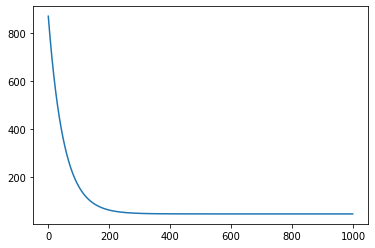

In [14]:
plt.plot(range(1000), cost_history)

In [15]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [221]:
coef_determination(y, prediction)

0.962101864081567

In [39]:
def learning_curv(cost_history): 
    learning_data  = 1 - (cost_history / max(cost_history))
    plt.plot(range(1000), learning_data*100)

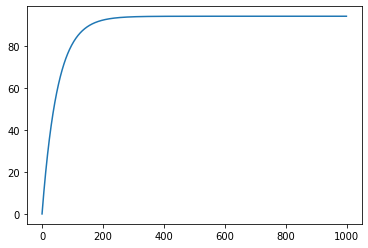

In [40]:
learning_curv(cost_history)

In [43]:
import seaborn as sns

In [46]:
sns.scatterplot(x=x, y=prediction)

ValueError: If using all scalar values, you must pass an index